# Time Series Data Preparation for Deep Learning (LSTM, RNN) models)

In [1]:

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [7]:
df.head(12)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [9]:
df[['date','T_out','RH_2','Appliances','lights']]

,date,T_out,RH_2,Appliances,lights
0,2016-01-11 17:00:00,6.600000,44.790000,60,30
1,2016-01-11 17:10:00,6.483333,44.722500,60,30
2,2016-01-11 17:20:00,6.366667,44.626667,50,30
3,2016-01-11 17:30:00,6.250000,44.590000,50,40
4,2016-01-11 17:40:00,6.133333,44.530000,60,40
...,...,...,...,...,...
19730,2016-05-27 17:20:00,22.733333,42.025714,100,0
19731,2016-05-27 17:30:00,22.600000,42.080000,90,0
19732,2016-05-27 17:40:00,22.466667,42.768571,270,10
19733,2016-05-27 17:50:00,22.333333,43.036000,420,10


In [29]:
df1= df[['date','Appliances','T_out','RH_2']]

In [31]:
df1.head(15)

,date,Appliances,T_out,RH_2
0,2016-01-11 17:00:00,60,6.600000,44.790000
1,2016-01-11 17:10:00,60,6.483333,44.722500
2,2016-01-11 17:20:00,50,6.366667,44.626667
3,2016-01-11 17:30:00,50,6.250000,44.590000
4,2016-01-11 17:40:00,60,6.133333,44.530000
5,2016-01-11 17:50:00,50,6.016667,44.500000
6,2016-01-11 18:00:00,60,5.900000,44.500000
7,2016-01-11 18:10:00,60,5.916667,44.500000
8,2016-01-11 18:20:00,60,5.933333,44.433333
9,2016-01-11 18:30:00,70,5.950000,44.400000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [13]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [15]:
df['date']=pd.to_datetime(df['date'])

<Axes: xlabel='date'>

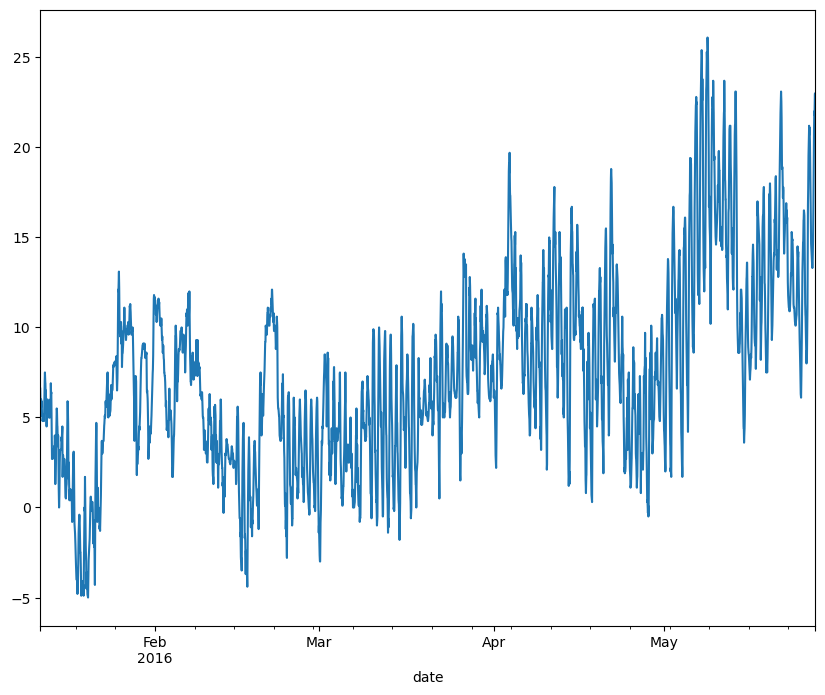

In [17]:
df.set_index('date')['T_out'].plot()

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

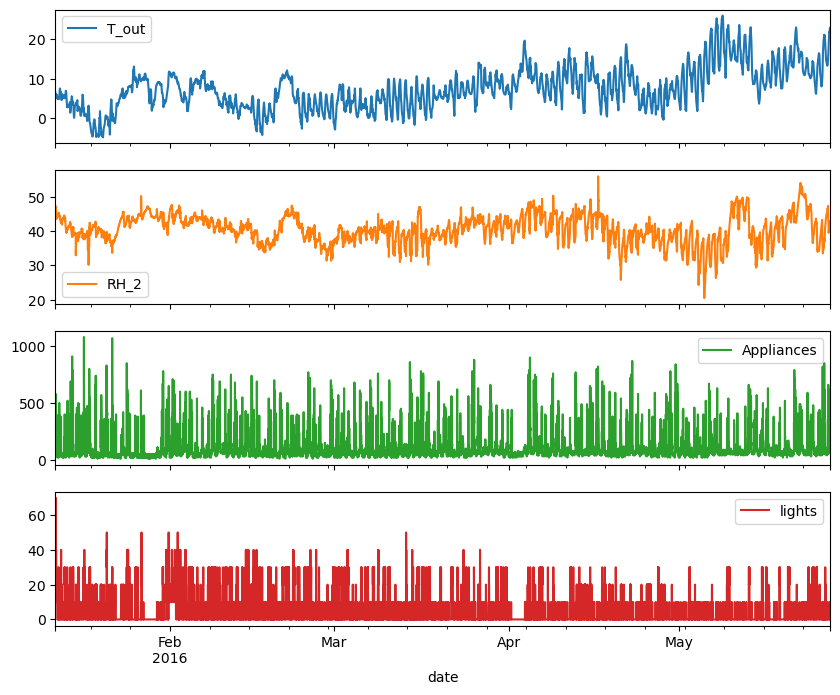

In [18]:
df.set_index('date')[['T_out','RH_2','Appliances','lights']].plot(subplots=True)

In [19]:
df.count()

date           19735
Appliances     19735
lights         19735
T1             19735
RH_1           19735
T2             19735
RH_2           19735
T3             19735
RH_3           19735
T4             19735
RH_4           19735
T5             19735
RH_5           19735
T6             19735
RH_6           19735
T7             19735
RH_7           19735
T8             19735
RH_8           19735
T9             19735
RH_9           19735
T_out          19735
Press_mm_hg    19735
RH_out         19735
Windspeed      19735
Visibility     19735
Tdewpoint      19735
rv1            19735
rv2            19735
dtype: int64

In [11]:
features=df[['Appliances','T_out','RH_2']].to_numpy().tolist()
target=df['Appliances'].tolist()

In [12]:
featuress=df[['Appliances','T_out','RH_2']]
featuress.head(14)

,Appliances,T_out,RH_2
0,60,6.600000,44.790000
1,60,6.483333,44.722500
2,50,6.366667,44.626667
3,50,6.250000,44.590000
4,60,6.133333,44.530000
5,50,6.016667,44.500000
6,60,5.900000,44.500000
7,60,5.916667,44.500000
8,60,5.933333,44.433333
9,70,5.950000,44.400000


In [13]:
features[0:11]

[[60.0, 6.6, 44.79],
 [60.0, 6.48333333333333, 44.7225],
 [50.0, 6.36666666666667, 44.6266666666667],
 [50.0, 6.25, 44.59],
 [60.0, 6.133333333333329, 44.53],
 [50.0, 6.01666666666667, 44.5],
 [60.0, 5.9, 44.5],
 [60.0, 5.91666666666667, 44.5],
 [60.0, 5.93333333333333, 44.433333333333294],
 [70.0, 5.95, 44.4],
 [230.0, 5.96666666666667, 44.4]]

In [14]:
target[0:11]

[60, 60, 50, 50, 60, 50, 60, 60, 60, 70, 230]

In [15]:
ts_generator = TimeseriesGenerator(features , target , length =6, sampling_rate = 1,batch_size=1)

In [16]:
ts_generator[0]

(array([[[60.        ,  6.6       , 44.79      ],
         [60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ]]]),
 array([60]))

In [17]:
featuress.head(14)

,Appliances,T_out,RH_2
0,60,6.600000,44.790000
1,60,6.483333,44.722500
2,50,6.366667,44.626667
3,50,6.250000,44.590000
4,60,6.133333,44.530000
5,50,6.016667,44.500000
6,60,5.900000,44.500000
7,60,5.916667,44.500000
8,60,5.933333,44.433333
9,70,5.950000,44.400000


In [18]:
ts_generator[0][0][0].shape

(6, 3)

In [19]:
ts_generator[1]

(array([[[60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ],
         [60.        ,  5.9       , 44.5       ]]]),
 array([60]))

In [20]:
ts_generator[2]

(array([[[50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ],
         [60.        ,  5.9       , 44.5       ],
         [60.        ,  5.91666667, 44.5       ]]]),
 array([60]))

In [21]:
ts_generator[5]

(array([[[ 50.        ,   6.01666667,  44.5       ],
         [ 60.        ,   5.9       ,  44.5       ],
         [ 60.        ,   5.91666667,  44.5       ],
         [ 60.        ,   5.93333333,  44.43333333],
         [ 70.        ,   5.95      ,  44.4       ],
         [230.        ,   5.96666667,  44.4       ]]]),
 array([580]))

In [22]:
len(ts_generator)

19729

In [23]:
ts_generator = TimeseriesGenerator(features , target , length =6, sampling_rate = 1,batch_size=1,stride=2)

In [24]:
len(ts_generator)

9865

In [25]:
ts_generator[0]

(array([[[60.        ,  6.6       , 44.79      ],
         [60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ]]]),
 array([60]))

In [26]:
ts_generator[1]

(array([[[50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ],
         [60.        ,  5.9       , 44.5       ],
         [60.        ,  5.91666667, 44.5       ]]]),
 array([60]))

In [27]:
ts_generator[2]

(array([[[60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ],
         [60.        ,  5.9       , 44.5       ],
         [60.        ,  5.91666667, 44.5       ],
         [60.        ,  5.93333333, 44.43333333],
         [70.        ,  5.95      , 44.4       ]]]),
 array([230]))

In [28]:
ts_generator[3]

(array([[[ 60.        ,   5.9       ,  44.5       ],
         [ 60.        ,   5.91666667,  44.5       ],
         [ 60.        ,   5.93333333,  44.43333333],
         [ 70.        ,   5.95      ,  44.4       ],
         [230.        ,   5.96666667,  44.4       ],
         [580.        ,   5.98333333,  44.4       ]]]),
 array([430]))

In [29]:
featuress.head(14)

,Appliances,T_out,RH_2
0,60,6.600000,44.790000
1,60,6.483333,44.722500
2,50,6.366667,44.626667
3,50,6.250000,44.590000
4,60,6.133333,44.530000
5,50,6.016667,44.500000
6,60,5.900000,44.500000
7,60,5.916667,44.500000
8,60,5.933333,44.433333
9,70,5.950000,44.400000


# End to End Multivariate Time Series Modeling using LSTM

In [31]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [32]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# Attribute Information:

date time year-month-day hour:minute:second
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chievres weather station), in Celsius
Pressure (from Chievres weather station), in mm Hg
RH_out, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional

In [34]:

df['date'] = pd.to_datetime(df['date'])

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

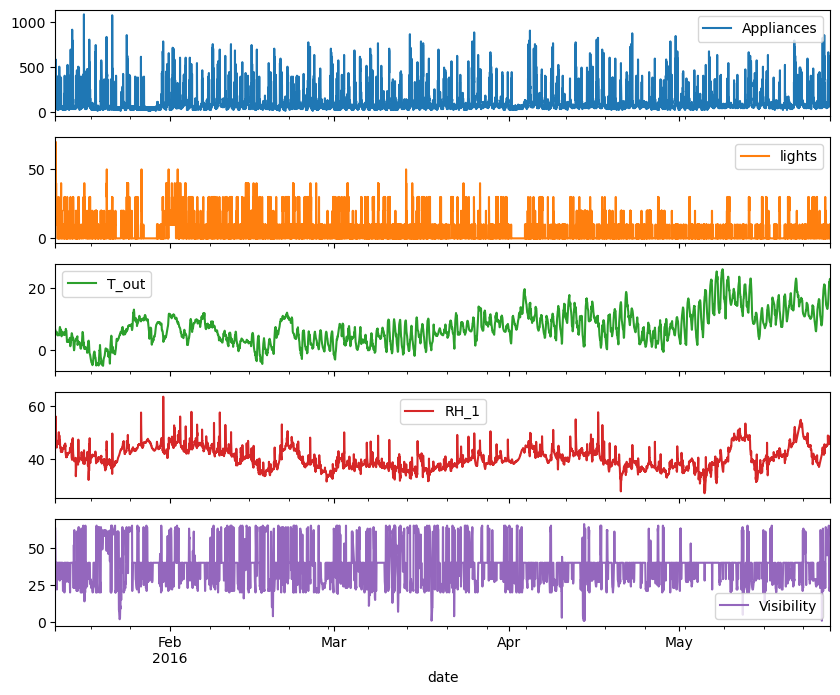

In [35]:
df.set_index('date')[['Appliances', 'lights','T_out', 'RH_1', 'Visibility']].plot(subplots=True)

In [36]:

df_input=df[['Appliances','T_out', 'RH_1', 'Visibility']]

In [37]:

df_input

,Appliances,T_out,RH_1,Visibility
0,60,6.600000,47.596667,63.000000
1,60,6.483333,46.693333,59.166667
2,50,6.366667,46.300000,55.333333
3,50,6.250000,46.066667,51.500000
4,60,6.133333,46.333333,47.666667
...,...,...,...,...
19730,100,22.733333,46.560000,23.666667
19731,90,22.600000,46.500000,24.500000
19732,270,22.466667,46.596667,25.333333
19733,420,22.333333,46.990000,26.166667


In [38]:

df_input.describe()

,Appliances,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.259739,38.330834
std,102.524891,5.317409,3.979299,11.794719
min,10.000000,-5.000000,27.023333,1.000000
25%,50.000000,3.666667,37.333333,29.000000
50%,60.000000,6.916667,39.656667,40.000000
75%,100.000000,10.408333,43.066667,40.000000
max,1080.000000,26.100000,63.360000,66.000000


In [39]:

df_input.query("Appliances > 500")

,Appliances,T_out,RH_1,Visibility
11,580,5.983333,46.396667,40.000000
314,520,2.900000,41.530000,36.333333
392,550,2.033333,43.433333,40.000000
393,690,2.100000,43.766667,40.000000
394,620,2.166667,43.693333,40.000000
...,...,...,...,...
19586,600,20.833333,44.066667,40.000000
19587,520,20.900000,43.366667,40.000000
19684,580,15.900000,47.226667,61.000000
19685,660,16.100000,47.693333,61.000000


In [40]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [41]:

data_scaled

array([[0.04672897, 0.37299035, 0.56618659, 0.95384615],
       [0.04672897, 0.36923901, 0.54132648, 0.89487179],
       [0.03738318, 0.36548767, 0.53050179, 0.83589744],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [42]:

features=data_scaled
target=data_scaled[:,0]

In [43]:

TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179]]]),
 array([0.03738318]))

In [44]:

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [45]:

x_train.shape

(15788, 4)

In [46]:
x_test.shape

(3947, 4)

In [47]:

win_length=720
batch_size=32
num_features=4
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [48]:
train_generator[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         ...,
         [0.06542056, 0.25241158, 0.31584258, 0.79230769],
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256]],
 
        [[0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         ...,
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
         [0.06542056, 0.21221865, 0.30923768, 0.6       ]],
 
        [[0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         [0.04672897, 0.35798499, 0.53141914, 0.71794872],
         ...,
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
        

In [1]:
print(f"Sample X shape: {sample_x.shape}")  # (1, 10, num_features)

NameError: name 'sample_x' is not defined

In [51]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 720, 128)       │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 720, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 720, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 720, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 720, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,153 (973.25 KB)

 Trainable params: 249,153 (973.25 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
import tensorflow as tf

# Callback EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=2,
                                                   mode='min')

# Compilation du modèle
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

# Entraînement du modèle
history = model.fit(train_generator, 
                    epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])


Epoch 1/50


C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


471/471 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - loss: 0.0113 - mean_absolute_error: 0.0609 - val_loss: 0.0057 - val_mean_absolute_error: 0.0477
Epoch 2/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 514s 1s/step - loss: 0.0086 - mean_absolute_error: 0.0499 - val_loss: 0.0045 - val_mean_absolute_error: 0.0399
Epoch 3/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 459s 976ms/step - loss: 0.0060 - mean_absolute_error: 0.0403 - val_loss: 0.0033 - val_mean_absolute_error: 0.0310
Epoch 4/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 403s 856ms/step - loss: 0.0049 - mean_absolute_error: 0.0351 - val_loss: 0.0032 - val_mean_absolute_error: 0.0290
Epoch 5/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 384s 814ms/step - loss: 0.0046 - mean_absolute_error: 0.0339 - val_loss: 0.0032 - val_mean_absolute_error: 0.0295
Epoch 6/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 382s 812ms/step - loss: 0.0045 - mean_absolute_error: 0.0330 - val_loss: 0.0032 - val_mean_absolute_error: 0.0290
Epoch 7/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 445s 945ms/step - loss: 0.0045 - mean_absolute_error:

In [56]:

model.evaluate(test_generator, verbose=0)


[0.003218993078917265, 0.029301118105649948]

In [60]:

predictions = model.predict(test_generator)


101/101 ━━━━━━━━━━━━━━━━━━━━ 29s 281ms/step


In [62]:

predictions.shape[0]

3227

In [64]:

predictions

array([[0.07287662],
       [0.09993748],
       [0.12210979],
       ...,
       [0.08676332],
       [0.25758445],
       [0.2656747 ]], dtype=float32)

In [66]:

y_test

array([0.3364486 , 0.54205607, 0.28971963, ..., 0.24299065, 0.38317757,
       0.39252336])

In [68]:

x_test

array([[0.3364486 , 0.34297964, 0.30923768, 0.6       ],
       [0.54205607, 0.34726688, 0.3055683 , 0.6       ],
       [0.28971963, 0.35155413, 0.30455921, 0.6       ],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [70]:
x_test[:,1:][win_length:]

array([[0.45337621, 0.20851298, 0.6       ],
       [0.47106109, 0.18282726, 0.6       ],
       [0.48874598, 0.18466196, 0.6       ],
       ...,
       [0.88317256, 0.53866618, 0.37435897],
       [0.87888532, 0.54949087, 0.38717949],
       [0.87459807, 0.53875791, 0.4       ]])

In [72]:

df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [74]:
df_pred

,0,0,1,2
0,0.072877,0.453376,0.208513,0.600000
1,0.099937,0.471061,0.182827,0.600000
2,0.122110,0.488746,0.184662,0.600000
3,0.341482,0.506431,0.193996,0.600000
4,0.146634,0.524116,0.181818,0.600000
...,...,...,...,...
3222,0.086682,0.891747,0.537657,0.348718
3223,0.101880,0.887460,0.536006,0.361538
3224,0.086763,0.883173,0.538666,0.374359
3225,0.257584,0.878885,0.549491,0.387179


In [76]:
rev_trans=scaler.inverse_transform(df_pred)

In [78]:

rev_trans

array([[ 87.9779885 ,   9.1       ,  34.6       ,  40.        ],
       [116.93310753,   9.65      ,  33.66666667,  40.        ],
       [140.65747067,  10.2       ,  33.73333333,  40.        ],
       ...,
       [102.83675492,  22.46666667,  46.59666667,  25.33333333],
       [285.61536431,  22.33333333,  46.99      ,  26.16666667],
       [294.27193999,  22.2       ,  46.6       ,  27.        ]])

In [80]:

df_final=df_input[predictions.shape[0]*-1:]

In [82]:

df_final.count()

Appliances    3227
T_out         3227
RH_1          3227
Visibility    3227
dtype: int64

In [84]:

df_final['App_Pred']=rev_trans[:,0]

C:\Users\rtekem\AppData\Local\Temp\ipykernel_1980\2907525102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred']=rev_trans[:,0]


In [86]:

df_final

,Appliances,T_out,RH_1,Visibility,App_Pred
16508,90,9.100000,34.600000,40.000000,87.977988
16509,120,9.650000,33.666667,40.000000,116.933108
16510,390,10.200000,33.733333,40.000000,140.657471
16511,240,10.750000,34.072500,40.000000,375.386265
16512,120,11.300000,33.630000,40.000000,166.898170
...,...,...,...,...,...
19730,100,22.733333,46.560000,23.666667,102.749636
19731,90,22.600000,46.500000,24.500000,119.012037
19732,270,22.466667,46.596667,25.333333,102.836755
19733,420,22.333333,46.990000,26.166667,285.615364


<Axes: >

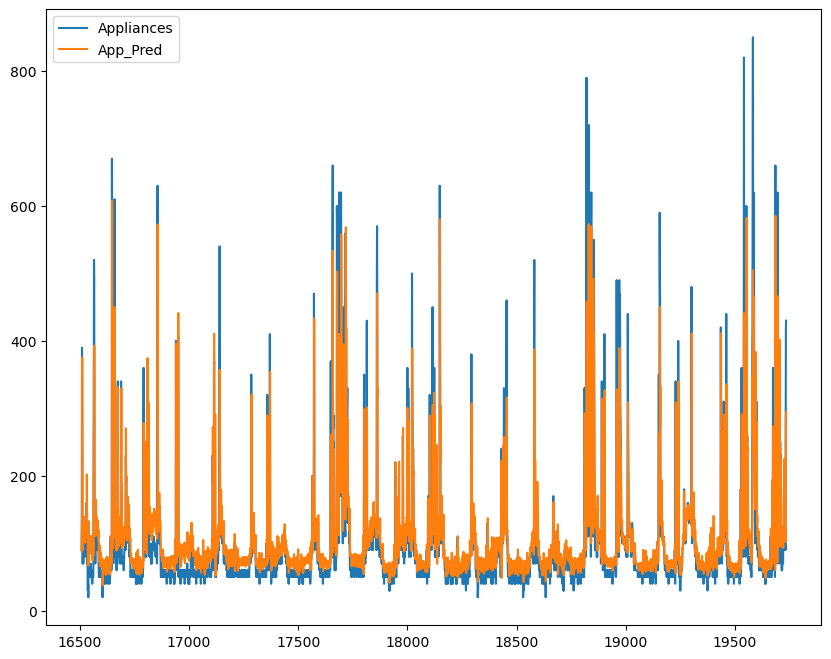

In [88]:

df_final[['Appliances','App_Pred']].plot()

In [97]:
!pip install optuna


   ---------------------------------------- 0.0/383.6 kB ? eta -:--:--
   ---- ----------------------------------- 41.0/383.6 kB ? eta -:--:--
   ----------- ---------------------------- 112.6/383.6 kB 1.3 MB/s eta 0:00:01
   ----------------------- ---------------- 225.3/383.6 kB 1.4 MB/s eta 0:00:01
   ----------------------------- ---------- 286.7/383.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  378.9/383.6 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 383.6/383.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.6 kB ? eta -:--:--
   -------------------------------------- - 225.3/233.6 kB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 233.6/233.6 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 2.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import optuna
import pandas as pd

# Fonction d'optimisation avec Optuna
def objective(trial):
    # Hyperparamètres à optimiser
    lstm_units_1 = trial.suggest_int("lstm_units_1", 64, 256, step=32)
    lstm_units_2 = trial.suggest_int("lstm_units_2", 64, 256, step=32)
    lstm_units_3 = trial.suggest_int("lstm_units_3", 32, 128, step=32)
    dropout_rate = trial.suggest_float("dropout_rate", 0.2, 0.5, step=0.1)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
    patience = trial.suggest_int("patience", 2, 5)  # EarlyStopping

    # Définition du modèle
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(lstm_units_1, input_shape=(win_length, num_features), return_sequences=True),
        tf.keras.layers.LeakyReLU(alpha=0.5),

        tf.keras.layers.LSTM(lstm_units_2, return_sequences=True),
        tf.keras.layers.LeakyReLU(alpha=0.5),
        tf.keras.layers.Dropout(dropout_rate),

        tf.keras.layers.LSTM(lstm_units_3, return_sequences=False),
        tf.keras.layers.Dropout(dropout_rate),

        tf.keras.layers.Dense(1)  # Sortie pour la prédiction
    ])

    # Compilation du modèle
    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
                  metrics=[tf.metrics.MeanAbsoluteError()])

    # Callback EarlyStopping
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                       patience=patience,
                                                       mode='min',
                                                       restore_best_weights=True)

    # Entraînement du modèle
    history = model.fit(train_generator, 
                        epochs=50,
                        validation_data=test_generator,
                        shuffle=False,
                        callbacks=[early_stopping],
                        verbose=0)  # Désactiver l'affichage des logs

    # Retourner la meilleure val_loss atteinte
    return min(history.history['val_loss'])

# Lancement de l'optimisation avec Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

# Meilleurs hyperparamètres trouvés
best_params = study.best_params
print("Meilleurs hyperparamètres :", best_params)

# Reconstruction du meilleur modèle avec les meilleurs hyperparamètres
best_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(best_params["lstm_units_1"], input_shape=(win_length, num_features), return_sequences=True),
    tf.keras.layers.LeakyReLU(alpha=0.5),

    tf.keras.layers.LSTM(best_params["lstm_units_2"], return_sequences=True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dropout(best_params["dropout_rate"]),

    tf.keras.layers.LSTM(best_params["lstm_units_3"], return_sequences=False),
    tf.keras.layers.Dropout(best_params["dropout_rate"]),

    tf.keras.layers.Dense(1)
])

# Compilation du modèle optimisé
best_model.compile(loss=tf.losses.MeanSquaredError(),
                   optimizer=tf.optimizers.Adam(learning_rate=best_params["learning_rate"]),
                   metrics=[tf.metrics.MeanAbsoluteError()])

# Callback EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=best_params["patience"],
                                                   mode='min',
                                                   restore_best_weights=True)

# Entraînement du modèle optimisé
history = best_model.fit(train_generator, 
                         epochs=50,
                         validation_data=test_generator,
                         shuffle=False,
                         callbacks=[early_stopping])

# Évaluation du modèle
best_model.evaluate(test_generator, verbose=0)

# Prédictions
predictions = best_model.predict(test_generator)

# Reconstruction du DataFrame des prédictions
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:, 1:][win_length:])], axis=1)
rev_trans = scaler.inverse_transform(df_pred)

# Récupération des vraies valeurs
df_final = df_input[predictions.shape[0] * -1:]
df_final['App_Pred'] = rev_trans[:, 0]

# Affichage des courbes
df_final[['Appliances', 'App_Pred']].plot()
